# The perceptron -  Recognising the MNIST digits

<div>Table of contents</div>
<div id="toc"></div>

In [1]:
%matplotlib inline
from pylab import *
from utils import *

Let us implement a perceptron that categorize the MNIST images as numbers. As you will see below the behaviour of the network is far from optimal. As we see the network [learns well the training set](#Plotting-the-results-of-test). Nevertheless  its behaviour in a [test with new digits](#Spreading-of-the-network-during-test) is far from optimal. **The task we are asking the network to learn is too difficult!!**
### Training
#### Initializing data and parameters
First we initialize the dataset (see [The MNIST dataset](http://francesco-mannella.github.io/neunet-basics/mnist.html)), the we define few parameters and initialize the main variables:

In [2]:
#-----------------------------------------------------------
# training

# Set the number of patterns 
n_patterns = 500

# Take 'n_patterns' rows
indices = arange(training_length)
shuffle(indices)
indices = indices[:n_patterns]

# Get patterns
patterns = array(mndata.train_images)[indices]

# Rescale all patterns between 0 and 1
patterns = sign(patterns/255.0)

# Get the labels of the patterns
labels = array(mndata.train_labels)[indices]

# Constants

# Number of repetitions of 
# the pattern series
epochs = 30

# Number of trials for learning
stime = epochs*n_patterns

# Create a list of pattern indices.
# We will reshuffle it at each 
# repetition of the series
pattern_indices = arange(n_patterns)

# Learning rate
eta = 0.0001

# Number of output unit 
# (remember that the input is given
# by a 28*28 vector)
m = 10

# Variables 

# Init weights
w = zeros([m, n+1])

# Init input units
x = zeros(n)

# init net input
net = zeros(m)

# Init output units
y = zeros(m)

# Init desired output vector
y_target = zeros(m)

# We will store the input, output and error history
input_store = zeros([n,stime])
output_store = zeros([m,stime])
label_store = zeros([m,stime])
squared_errors = zeros(epochs)

Let us visualize the first 20 patterns of the trining set:

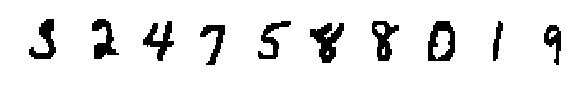

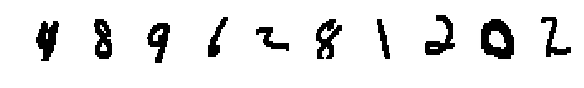

In [3]:
for i in xrange(20):
    # Create a new figure after each 10-th item
    if i%10 == 0:
        fig = figure(figsize = (20, 1))
    
    # Plot current item (we use the 
    # function plot_img in our utils.py)
    plot_img( to_mat(patterns[i]), 
        fig, (i%10)+1, windows = 20 )
    
    # show figure after all 1o items
    # are plotted
    if i%10 == 9:
        show()

#### Spreading of the network during training
Here starts the core part, iterating the timesteps. We also divide the training phase in epochs. Each epoch is a single presentation of the whole input pattern series. The sum of squared errors will be grouped by epochs.

In [4]:
# counter of repetitions 
# of the series of patterns
epoch = -1


# Iterate trials
for t in xrange(stime) :
    
    # Reiterate the input pattern 
    # sequence through timesteps
    
    # Reshuffle at the end 
    # of the series
    if t%n_patterns == 0:
        shuffle(pattern_indices)
        epoch += 1
    
    # Current pattern 
    k = pattern_indices[t%n_patterns]
    
    # Aggregate inputs and the bias unit
    x = hstack([ 1, patterns[k] ])
    
    # Only the unit representing the desired 
    # category is set to 1
    y_target *= 0
    y_target[labels[k]] = 1
    
    # !!!! The dot product becomes a matrix 
    # product with more than one output unit !!!!
    net = dot(w,x) 
    
    # output function
    y = step(net)
    
    # Learning - outer product
    w += eta*outer(y_target - y, x);
    
    # Store data
    input_store[:,t] = x[1:]
    output_store[:,t] = y
    label_store[:,t] = y_target
    
    squared_errors[epoch] += 0.5*sum((y_target - y)**2)

#### Plotting the results of training
We plot the history of the squared errors through epocs a

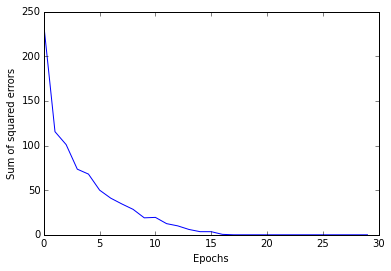

In [5]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(squared_errors)
xlabel("Epochs")
ylabel("Sum of squared errors")

and a visualization of the weights to each ouput unit. Each set of weights seems to reproduce (in a very raugh manner) a generalization of the target digit.

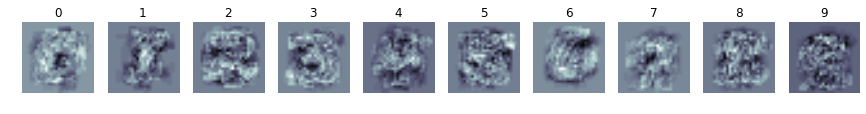

In [6]:
figure(figsize=(15,2))
for i in xrange(m) : 
    subplot(1,m,i+1)
    title(i)
    im = to_mat(w[i,1:]) 
    imshow(im, cmap=cm.bone)
    axis('off')

show()

### Testing
#### Initializing data and parameters
Now we create a new dataset to test the network and reset some variables: 

In [7]:
#-----------------------------------------------------------
# test

# Set the number of patterns 
n_patterns = 1000

# Take 'n_patterns' rows
indices = arange(test_length)
shuffle(indices)
indices = indices[:n_patterns]

# Get patterns
patterns = array(mndata.test_images)[indices]

# Rescale all patterns between 0 and 1
patterns = sign(patterns/255.0)

# Get the labels of the patterns
labels = array(mndata.test_labels)[indices]

# Constants

# Create a list of pattern indices.
# We will reshuffle it at each 
# repetition of the series
pattern_indices = arange(n_patterns)
shuffle(pattern_indices)

# Clear variables 

x *= 0
net *= 0
y *= 0

# We will store the input, output and error history
input_store = zeros([patterns.shape[1], n_patterns])
output_store = zeros([m, n_patterns])
target_store = zeros(n_patterns)
error_store = zeros(n_patterns)

#### Spreading of the network during test
The network react to each test pattern in each spreading timestep:

In [8]:
# Iterate trials
for p in xrange(n_patterns) :
        
    # Aggregate inputs and the bias unit
    x = hstack([ 1, patterns[p] ])
    
    # !!!! The dot product becomes a matrix 
    # product with more than one output unit !!!!
    net = dot(w,x) 
    
    # output function
    y = step(net)
  
    y_index = squeeze(find(y==1))
    y_index_target = int(labels[p])
    
    error = 0
    if y_index.size < 2 :
        if y_index == y_index_target :
            error = 1    
    # store
    input_store[:,p] = x[1:]
    output_store[:,p] = y
    target_store[p] = labels[p]
    error_store[p] = error

Let us see what is the proportion of correct answers of the network:

In [9]:
    
print "Proportion of correct answers:{}" \
    .format(sum(error_store)/float(n_patterns))

Proportion of correct answers:0.684


#### Plotting the results of test

Now we plot few test samples to get the real idea. For each sample we plot the input digit on the top, the answer of the network on the center and the target digit on the left. Squared brakets indicate that the network gave zero or more than one answer.  

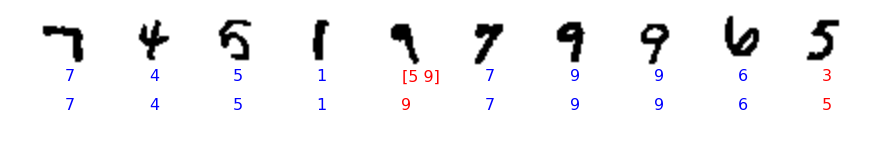

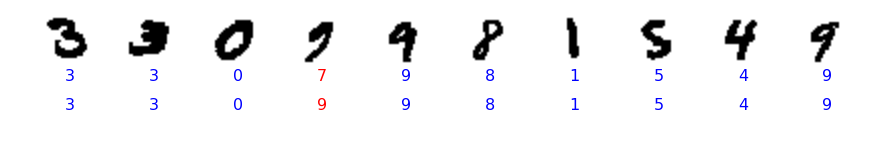

In [10]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(8, 4*10)
  
n_patterns = 20

for p in xrange(n_patterns) :  
    
    im = to_mat(input_store[:,p]) 
       
    k = p%10    
    
    if k==0 :
        fig = figure(figsize=(15,2))
    
    ax1 = fig.add_subplot(gs[:4,(k*4):(k*4+4)])
    ax1.imshow(im, cmap=cm.binary)
    ax1.set_axis_off()

    
    if error_store[p] == True :
        color = "blue"
    else :
        color = "red"             
 
    y = squeeze(find(output_store[:,p]==1))
    y_target = int(labels[p])
    
    ax2 = fig.add_subplot(gs[4:6,(k*4):(k*4+4)])
    ax2.text(0.5,0.5,"{}".format(y),
             fontsize="16", color=color)
    axis("off")
    
    
    ax3 = fig.add_subplot(gs[6:,(k*4):(k*4+4)])
    ax3.text(0.5,0.5,"{}".format(y_target),
             fontsize = "16", color=color )
    axis("off")
    
    if k == 9:
        show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
The next cell is just for styling

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../style/ipybn.css", "r").read()
    return HTML(styles)
css_styling()